### 金融風險評估-使用UCI Credit Card Default Dataset進行違約風險預測：

- UCI Credit Card Default Dataset：

- 內容: 該數據集包含台灣某銀行的信用卡客戶數據（2005年4月至9月），包括23個特征（如信用額度、性別、教育程度、還款記錄等）以及是否違約的標籤（二元分類：違約/未違約）。

	- 樣本數：30,000筆記錄，適合用於違約風險預測。

	- 適用性：模擬真實的信用卡違約風險評估場景。

以下是一個使用Python和Scikit-learn實現的範例，展示如何使用隨機森林（一種ensemble學習方法）對信用卡違約風險進行預測，並比較其與單一決策樹的性能。該範例包括數據下載、預處理、模型訓練和圖表生成，以幫助理解薈萃式學習的優勢。


In [ ]:
%%capture
%pip install wget

In [ ]:
#下載檔案
import wget
wget.download("https://github.com/roberthsu2003/machine_learning/raw/refs/heads/main/source_data/ChineseFont.ttf")

   ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1      20000    2          2         1   24      2      2     -1     -1   
1   2     120000    2          2         2   26     -1      2      0      0   
2   3      90000    2          2         2   34      0      0      0      0   
3   4      50000    2          2         1   37      0      0      0      0   
4   5      50000    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...          0          0          0         0       689         0   
1  ...       3272       3455       3261         0      1000      1000   
2  ...      14331      14948      15549      1518      1500      1000   
3  ...      28314      28959      29547      2000      2019      1200   
4  ...      20940      19146      19131      2000     36681     10000   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0         0         0   

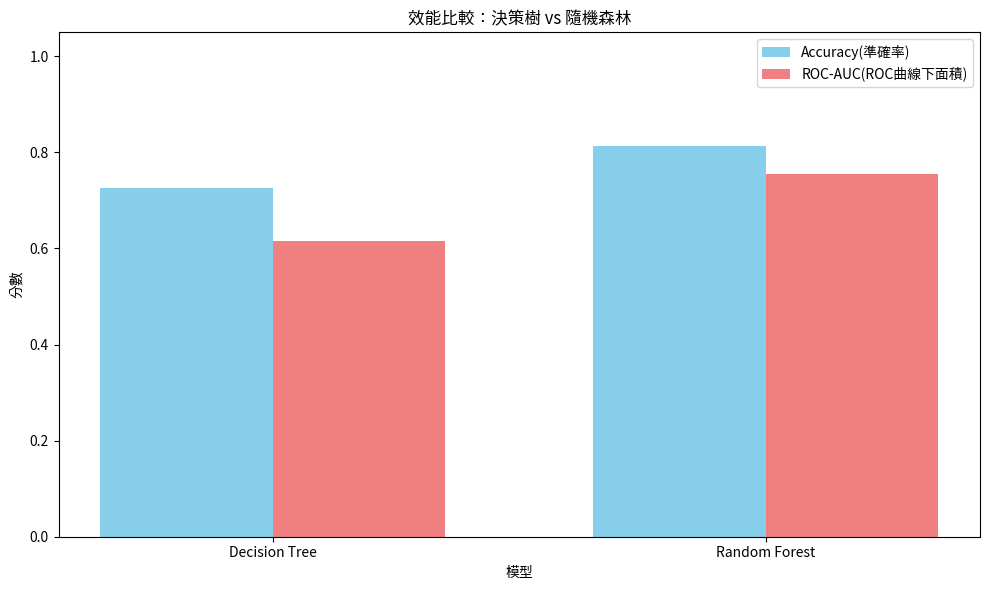

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.font_manager import fontManager

fontManager.addfont("ChineseFont.ttf")
mpl.rc('font', family="ChineseFont")

# 1. 數據下載
# UCI Credit Card Default Dataset需從以下網址下載：
# 資料來源說明:https://archive.ics.uci.edu/dataset/350/default+of+credit+card+clients
# https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls
# 下載後將文件保存為'default_credit_card.xls'
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls'
data = pd.read_excel(url, header=1)  # 跳過第一行（標題）

# 2. 數據預處理
# 移除ID列，選擇特征和標籤
X = data.drop(columns=['ID', 'default payment next month'])
y = data['default payment next month']

#print(data.head())

# 分割訓練和測試數據
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. 訓練隨機森林和單一決策樹模型
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
dt_model = DecisionTreeClassifier(random_state=42)

rf_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)

# 4. 預測並計算性能指標
rf_pred = rf_model.predict(X_test)
dt_pred = dt_model.predict(X_test)

rf_accuracy = accuracy_score(y_test, rf_pred)
dt_accuracy = accuracy_score(y_test, dt_pred)
rf_roc_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1]) #說明1
dt_roc_auc = roc_auc_score(y_test, dt_model.predict_proba(X_test)[:, 1])

print(f"Random Forest Accuracy: {rf_accuracy:.4f}, ROC-AUC: {rf_roc_auc:.4f}")
print(f"Decision Tree Accuracy: {dt_accuracy:.4f}, ROC-AUC: {dt_roc_auc:.4f}")

# 5. 繪製圖表比較模型性能
models = ['Decision Tree', 'Random Forest']
accuracies = [dt_accuracy, rf_accuracy]
roc_aucs = [dt_roc_auc, rf_roc_auc]

plt.figure(figsize=(10, 6))
bar_width = 0.35
index = np.arange(2)

plt.bar(index, accuracies, bar_width, label='Accuracy(準確率)', color='skyblue')
plt.bar(index + bar_width, roc_aucs, bar_width, label='ROC-AUC(ROC曲線下面積)', color='lightcoral')
plt.xlabel('模型')
plt.ylabel('分數')
plt.title('效能比較：決策樹 vs 隨機森林')
plt.xticks(index + bar_width / 2, models)
plt.ylim(0,1.05)
plt.legend()
plt.tight_layout()

# 保存圖表
plt.savefig('model_performance_comparison.png')
plt.show()

### 說明1:ROC-ACU
"ROC-AUC" 是評估分類模型效能的一個重要指標，特別是在二元分類問題中（例如，判斷信用卡客戶是否會違約）。它代表「接收者操作特徵曲線下面積 (Area Under the Receiver Operating Characteristic Curve)」。

們把它拆解開來理解：
1. **ROC 曲線 (Receiver Operating Characteristic Curve)**：
    - ROC 曲線是一個圖形，它展示了當我們改變分類模型的「決策閾值 (threshold)」時，模型的「**真陽性率 (True Positive Rate, TPR)**」與「**假陽性率 (False Positive Rate, FPR)**」之間的關係。
    - **真陽性率 (TPR)**：也稱為「敏感度 (Sensitivity)」或「召回率 (Recall)」。它衡量的是在所有**實際為正**的樣本中，有多少被模型**正確預測為正**的比例。 `TPR = TP / (TP + FN)` (TP = 真陽性, FN = 假陰性)
    - **假陽性率 (FPR)**：它衡量的是在所有**實際為負**的樣本中，有多少被模型**錯誤預測為正**的比例。 `FPR = FP / (FP + TN)` (FP = 假陽性, TN = 真陰性)
    - 一個理想的分類器，其 ROC 曲線會盡可能地靠近左上角（TPR=1, FPR=0）。
    - 一條對角線 (從左下到右上) 代表隨機猜測的效能。
2. **AUC (Area Under the Curve)**：
    - AUC 就是 ROC 曲線下方的面積。
    - 這個面積的值介於 0 和 1 之間。
    - **AUC = 1**：代表一個完美的分類器，能夠完美地區分所有正負樣本。
    - **AUC = 0.5**：代表模型的效能和隨機猜測一樣，沒有區分能力（ROC 曲線接近對角線）。
    - **AUC < 0.5**：代表模型的效能比隨機猜測還差（通常表示模型可能學到了相反的模式，或者標籤可能被反轉了）。
    - **AUC 越接近 1，表示模型的區分能力越好**，即它越能有效地將正樣本和負樣本分開。

### 在此範例中

```python
Random Forest Accuracy: 0.8133, ROC-AUC: 0.7549 
Decision Tree Accuracy: 0.7258, ROC-AUC: 0.6155
```

- **隨機森林 (Random Forest)** 的 ROC-AUC 是 `0.7549`。
- **決策樹 (Decision Tree)** 的 ROC-AUC 是 `0.6155`。

這表示：

- 隨機森林模型在區分「會違約」和「不會違約」的客戶方面，整體表現優於決策樹模型。
- 0.7549 的 ROC-AUC 意味著，如果你隨機抽取一個正樣本（例如，一個實際會違約的客戶）和一個負樣本（例如，一個實際不會違約的客戶），隨機森林模型有 75.49% 的機率會給予正樣本比負樣本更高的「違約機率」預測值。

**為什麼 ROC-AUC 很重要？**

- **對類別不平衡不敏感**：與準確率 (Accuracy) 不同，ROC-AUC 對於數據集中類別不平衡（例如，違約客戶遠少於非違約客戶）的情況不那麼敏感。在不平衡數據集上，即使模型只是簡單地將所有樣本預測為多數類，準確率也可能很高，但 ROC-AUC 能更好地反映模型對少數類的識別能力。
- **衡量模型的排序能力**：它衡量的是模型將正樣本排在負樣本之前的能力，而不僅僅是絕對的分類正確性。
- **閾值無關性**：ROC-AUC 評估的是模型在所有可能的決策閾值下的整體表現，而不是依賴於某個特定的閾值。

總而言之，ROC-AUC 是一個衡量分類模型「區分能力」的綜合指標，數值越高，代表模型越能有效地將不同類別的樣本區分開來。

⬆︎
### 範例說明
- 數據來源：使用UCI Credit Card Default Dataset，包含30,000筆真實信用卡客戶數據（2005年台灣某銀行），特征包括信用額度、還款記錄、帳單金額等，目標是預測客戶下個月是否違約（0=未違約，1=違約）。
- 模型：比較單一決策樹和隨機森林的性能，使用準確率（Accuracy）和ROC-AUC（衡量模型對違約和未違約的分類能力）作為評估指標。
- 輸出：程式碼會輸出兩個模型的準確率和ROC-AUC分數，並生成一個柱狀圖，比較兩者的性能。
- 結果：隨機森林通常在ROC-AUC指標上表現優於單一決策樹，顯示其在金融風險評估中的優勢（更高的ROC-AUC表示模型能更好地區分違約與未違約客戶）。

### 圖表展示

生成的柱狀圖（model_performance_comparison.png）將顯示隨機森林和單一決策樹在準確率和ROC-AUC上的表現差異。隨機森林通常具有更高的ROC-AUC分數，反映其在處理不平衡數據（違約案例較少）時的優越性。

